In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
# local imports
import DataAndPlotting as my

# Data

In [2]:
# store files names for all datasets
filenames: dict[str,str] = {
#    'ap2_t1'    : my.path_data + '1-ap2_t1.csv', 
#    'ap2_t2'    : my.path_data + '2-ap2_t2.csv', 
    'ap2' : my.path_data + '3-ap2_t0.csv',
    'ap4' : my.path_data + '5-ap4_t0.csv',
    'ap8' : my.path_data + '4-ap8_t0.csv'

} # ap==aperture, t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

ap2 columns:	 ['VAK [V]', 'I_356 [1e-13 A]', 'I_405 [1e-13 A]', 'I_436 [1e-13 A]', 'I_546 [1e-13 A]', 'I_577 [1e-13 A]']
ap4 columns:	 ['VAK [V]', 'I_356 [1e-13 A]', 'I_405 [1e-13 A]', 'I_436 [1e-13 A]', 'I_546 [1e-13 A]', 'I_577 [1e-13 A]']
ap8 columns:	 ['VAK [V]', 'I_356 [1e-13 A]', 'I_405 [1e-13 A]', 'I_436 [1e-13 A]', 'I_546 [1e-13 A]', 'I_577 [1e-13 A]']


In [3]:
colorDict = {
    '356 nm' : '#303030', # '#000000',
    '405 nm' : '#8200c8',
    '436 nm' : '#1d00ff',
    '546 nm' : '#569100', # '#96ff00',
    '577 nm' : '#b6bd02', # '#f6ff00',
}
colors = list(colorDict.values())
colors_dark = [my.darken_color(c, 1.2) for c in colors]

# Plot

In [22]:
def MaskNan(x,y) :
    if(len(x)!=len(y)) : raise Exception ("X and Y lengths do not match.") 
    # build mask that is False where a nan occurs in y
    mask = np.ones(len(x), dtype=bool)
    mask[ np.argwhere(np.isnan(y)) ] = False 
    # apply mask and return arrays
    return(x[mask], y[mask])

In [23]:
def PlotXmanyY(
    x: list[np.array], # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    vlines: list[float] = [], # plot vertical lines
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    if(logScale) : ax.set_yscale('log')
    for v in vlines : 
        plt.axvline(v, c='k',linewidth=0.8)
    # data
    for xi,yi,yl,ci in zip(x,y,yleg,c) : 
        xx, yy = MaskNan(xi,yi)
        plt.errorbar(xx, yy, yerr=yerr, xerr=xerr, elinewidth=1.5, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    if( yleg[0] != None) : plt.legend(loc='upper left')
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

In [27]:
def Simple40Plot(tables, apN) : 
    PlotXmanyY(
        x = [tables[apN]['VAK [V]']]*5,
        y = [
            tables[apN]['I_356 [1e-13 A]'], 
            tables[apN]['I_405 [1e-13 A]'], 
            tables[apN]['I_436 [1e-13 A]'], 
            tables[apN]['I_546 [1e-13 A]'], 
            tables[apN]['I_577 [1e-13 A]'], 
        ],
        yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm' ],
        c = colors,
        vlines = [0],
        xerr = 0.02,
        yerr = 3,
        xlab = '$V_{AK}$ [V]',
        ylab = '$I_{AK}$ [$10^{-13}$A]',
        linestyle = '',
        xlim = (-4.5, 0),
        ylim = (-20, 1500),
        fileName = my.path_fig + str(apN) +'.png'
    )

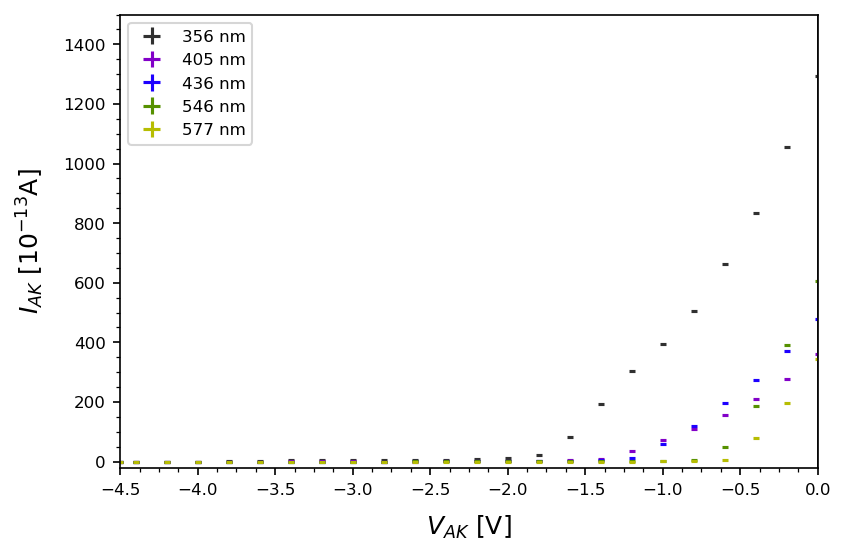

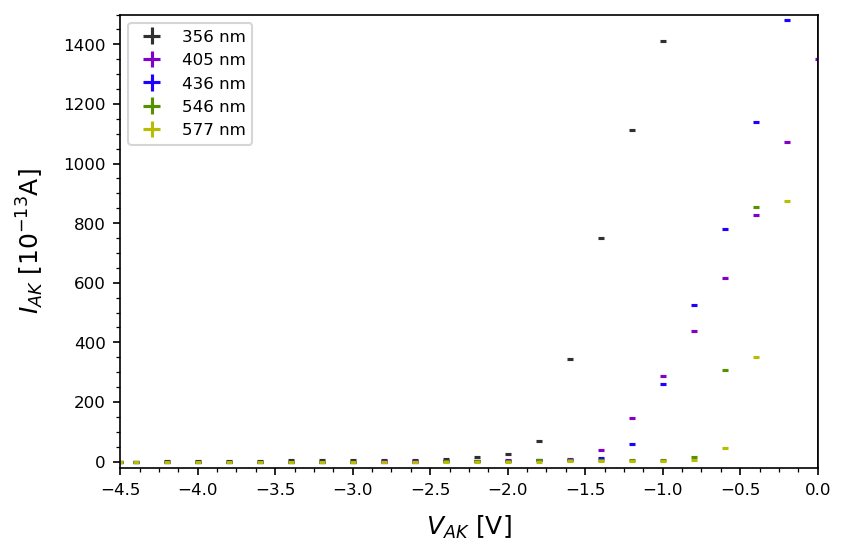

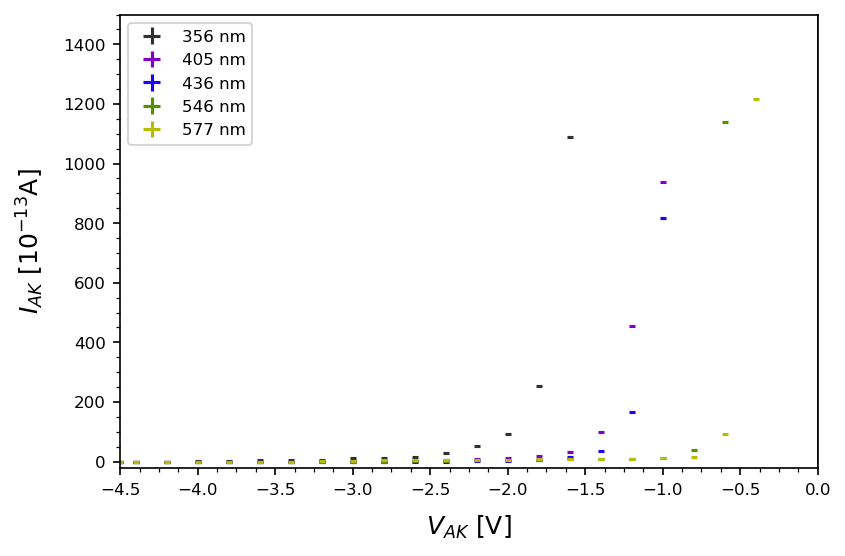

In [28]:
Simple40Plot(tables, apN='ap2')
Simple40Plot(tables, apN='ap4')
Simple40Plot(tables, apN='ap8')